In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
os.getcwd()

'W:\\NYC Data Science\\Capstone-Lending_Club\\Lending_Club_NYCDSA\\Garrett'

In [11]:
df = pd.read_csv('../../accepted_2007_to_2018Q4.csv.gz')
df.drop(columns='member_id', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=150)

In [13]:
df = df[df['issue_d'].notna()]
df['year']=df.issue_d.map(lambda x:int(x.split('-')[-1]))

In [14]:
df.shape

(2260668, 151)

In [15]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,year
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [7]:
# # Get names of indexes 
# indexNames = df[ df['year'] <=2012 ].index

# # Delete these row indexes from dataFrame
# df.drop(indexNames , inplace=True)
# df.shape

In [8]:
temp = df[df.loan_status=='Fully Paid'].copy()
temp.grade.value_counts()

B    340172
C    296037
A    220889
D    139899
E     57615
F     17567
G      4572
Name: grade, dtype: int64

In [9]:
temp = df[df.loan_status=='Fully Paid'].groupby('year')['int_rate'].agg('mean')
temp

year
2007    10.032524
2008    11.018913
2009    12.055536
2010    11.508266
2011    11.842513
2012    13.256130
2013    14.118374
2014    13.138697
2015    11.735008
2016    12.297107
2017    13.116912
2018    12.912844
Name: int_rate, dtype: float64

In [11]:
df.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

### How do the issued loans vary year after year?

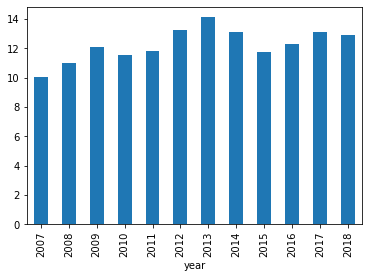

In [12]:
temp.plot.bar(by='year', y='int_rate')

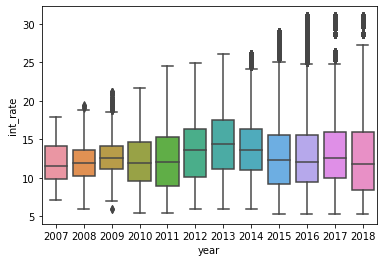

In [13]:
sns.boxplot(x = 'year', y = 'int_rate', data = df) 

Text(0.5, 1.0, 'Frequency of loan per year')

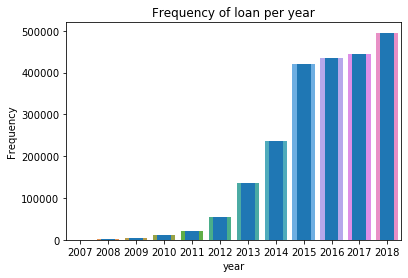

In [14]:
'''
     The largest period of growth occurred between 2012 & 2014. This is the time frame where investments from GOOGLE 
     began. 
     As they surpassed $1 Billion in total loans suring 2014 they filed for their IPO.
'''

sns.countplot(x='year',data=df)
df.year.value_counts(ascending=True).plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.title("Frequency of loan per year")

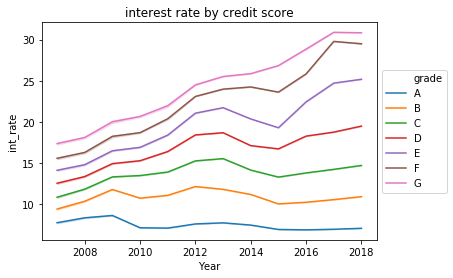

In [15]:
g = sns.lineplot(x='year',y='int_rate',hue='grade',data=df,hue_order=['A','B','C','D','E','F','G'])
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel('Year')
plt.title('interest rate by credit score')
plt.show()

Text(0.5, 1.0, 'Frequency of loan per class for each grade')

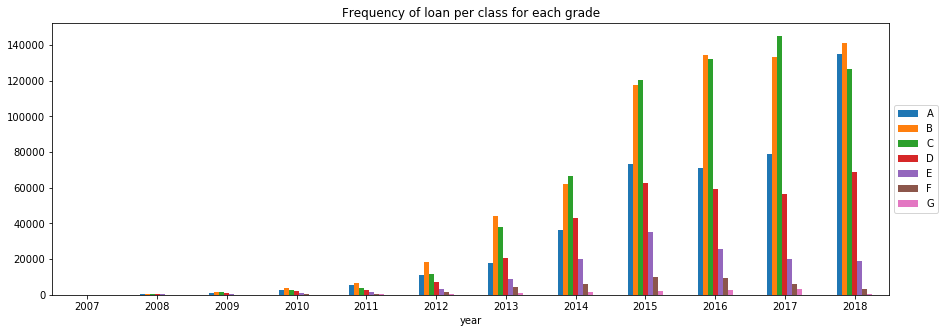

In [16]:

# Frequency of loan per class
# A increases the most with year

plt.rcParams["figure.figsize"] = [15, 5]
g = df.groupby(['year'])['grade'].value_counts().unstack(1).plot(kind='bar',)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xticks(rotation=0)
plt.title('Frequency of loan per class for each grade')


### Look into loan Grade

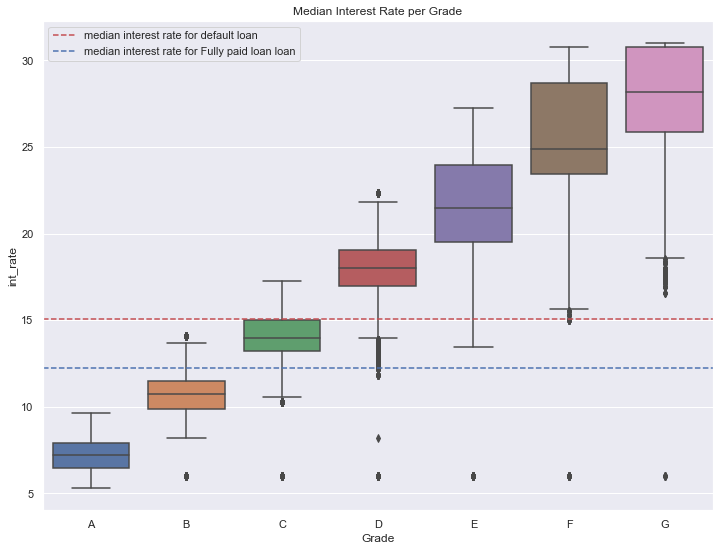

In [17]:
sns.set(rc={'figure.figsize':(12,9)})
sns.boxplot(x='grade',y='int_rate',data=df,order=['A','B','C','D','E','F','G'])
plt.xlabel('Grade')

positions = range(0,7)
labels = ("A","B","C","D","E","F","G")
median = df.int_rate.median()

sns.set(rc={'figure.figsize':(11.7,8.27)})
temp = df[df.loan_status=='Charged Off']
median = temp.int_rate.median()

plt.axhline(median,color='r',label = 'median interest rate for default loan',linestyle ="--")
sns.set(rc={'figure.figsize':(11.7,8.27)})

temp = df[df.loan_status=='Fully Paid']
median = temp.int_rate.median()
plt.axhline(median,color='b',label = 'median interest rate for Fully paid loan loan',linestyle ="--")

plt.title('Median Interest Rate per Grade')
plt.legend(loc = 'upper left')


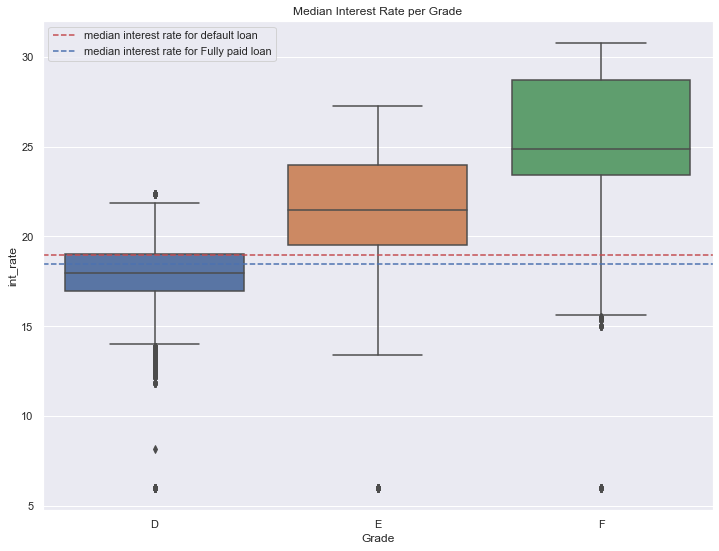

In [30]:
sns.set(rc={'figure.figsize':(12,9)})

grades = ['D', 'E', 'F']

sns.boxplot(x='grade',y='int_rate',data=df,order=grades)
plt.xlabel('Grade')

positions = range(0,7)
labels = grades
median = df.int_rate.median()

sns.set(rc={'figure.figsize':(11.7,8.27)})
temp = df.loc[(df.loan_status=='Charged Off') & (df.grade.isin(grades))]
median = temp.int_rate.median()

plt.axhline(median,color='r',label = 'median interest rate for default loan',linestyle ="--")
sns.set(rc={'figure.figsize':(11.7,8.27)})

temp = df.loc[(df.loan_status=='Fully Paid') & (df.grade.isin(grades))]
median = temp.int_rate.median()
plt.axhline(median,color='b',label = 'median interest rate for Fully paid loan',linestyle ="--")

plt.title('Median Interest Rate per Grade')
plt.legend(loc = 'upper left')


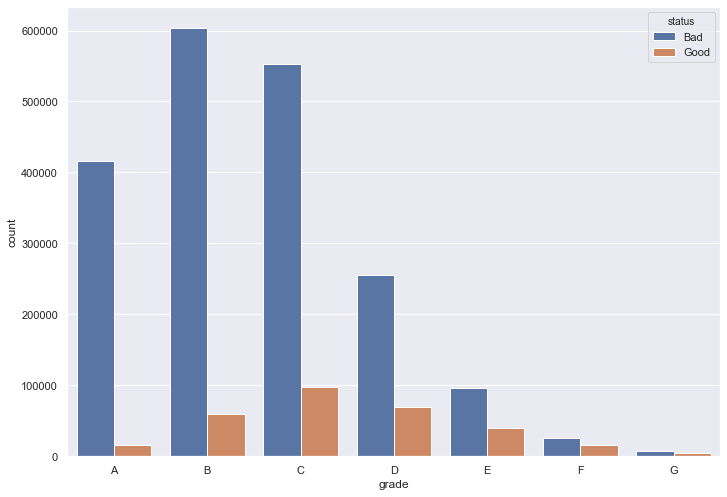

In [18]:
# default rate for each category

features = ['Charged Off','Default','Does not meet the credit policy. Status:Charged Off','In Grace Period','Late (16-30 days)','Late (31-120 days)']
temp = df[['grade','loan_status']].copy()
temp['status'] = temp.loan_status.apply(lambda x:'Good' if x in features  else 'Bad' )

sns.countplot(x='grade',hue='status',data=temp,order=["A","B","C","D","E","F","G"])

### Look into loan purpose

Text(0.5, 1.0, 'different purposes with their interest rate')

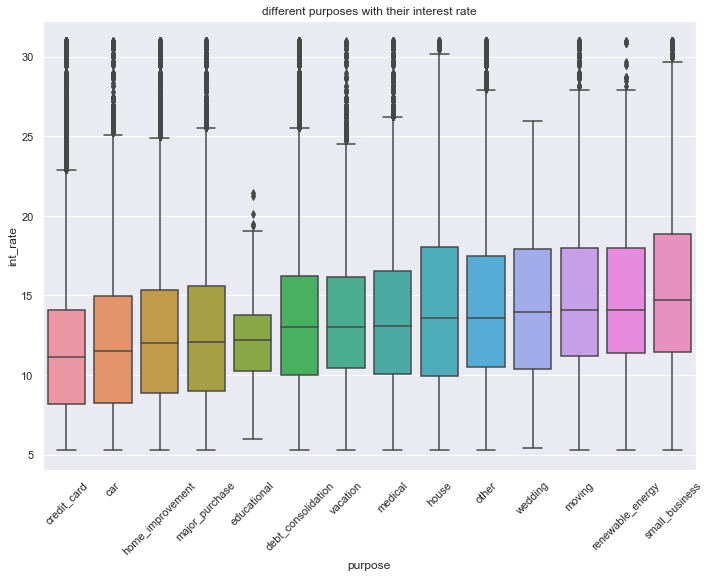

In [19]:
chart = sns.boxplot(x='purpose',y='int_rate',data=df,order = df.groupby("purpose")['int_rate'].median().sort_values().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('different purposes with their interest rate')


Text(0.5, 1.0, 'different purposes with their interest rate')

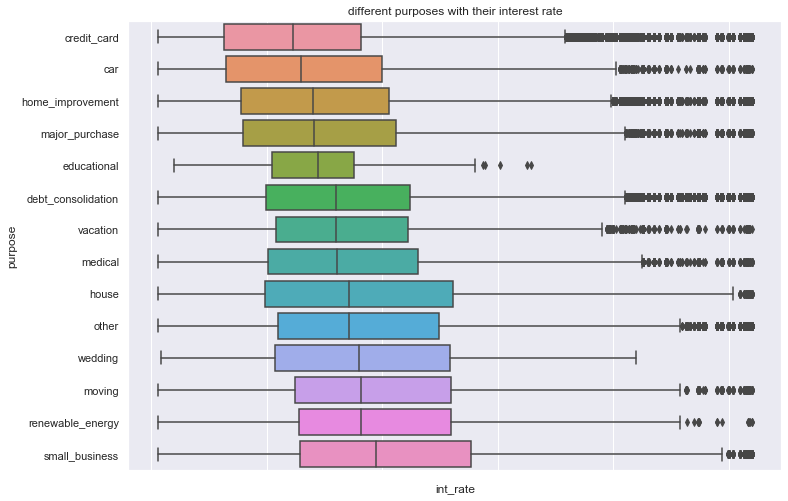

In [20]:
chart = sns.boxplot(y='purpose',x='int_rate',data=df,order = df.groupby("purpose")['int_rate'].median().sort_values().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('different purposes with their interest rate')